# Bulid classification model:

Import libraries

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import  precision_recall_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  f1_score
from sklearn.naive_bayes import  BernoulliNB
import joblib
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

Before in the feature engineering we have divided the data set into training and testing set for scaling.

In [ ]:
Train_data=pd.read_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/train_data_scaled.csv')

In [ ]:
Test_data=pd.read_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/test_data_scaled.csv')

Inspect the data

In [ ]:
Train_data

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR
0,-0.786250,-0.121637,-0.589227,1.089334,0.328832,-1.288765,0.071167,0.747057,0,-0.207458,-0.339050,-0.386825,-0.211546,0.842378,-0.635682,0.209246,0.450602,2.234890,-1.044855,-1.403831,-0.779498,-0.270655,-0.339409,-0.207458,0.488112,-1.288765,0.215596,-0.389454,-0.525038
1,1.494836,-0.121637,1.108356,0.905794,-0.479831,0.177915,0.071167,-1.338586,0,-0.207458,-0.294253,-0.386825,-0.211546,-1.128059,0.894798,0.209246,0.450602,-0.344070,1.315937,-0.167304,-0.779498,-0.270655,-0.294632,-0.207458,-0.495862,0.177915,-0.467182,-0.592234,-0.484449
2,1.494836,-0.121637,1.108356,-0.837838,-1.551778,0.177915,0.071167,0.747057,0,-0.207458,2.550321,2.585151,4.727097,-1.128059,0.894798,0.209246,0.450602,-0.317463,1.315937,1.069222,2.220627,-0.270655,2.548695,-0.207458,-1.534501,0.177915,-1.552570,-0.738972,0.253214
3,1.114655,-0.121637,0.781898,-0.011907,-0.799534,-0.188755,0.071167,0.747057,0,-0.207458,-0.271855,-0.386825,4.727097,-1.128059,-0.635682,0.209246,0.450602,-0.708742,1.315937,1.069222,0.220544,-0.270655,-0.272243,-0.207458,-0.778133,-0.188755,-0.810786,-0.540541,-0.205398
4,-0.786250,-0.121637,-0.850394,-0.654297,-0.103708,0.177915,0.071167,0.747057,0,-0.207458,-1.122988,-0.386825,-0.211546,0.842378,-1.658648,0.209246,0.450602,-0.582361,-1.044855,-1.403831,-0.779498,-0.270655,-1.123003,-0.207458,-0.131427,0.177915,-0.086343,0.101889,0.122764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155499,-0.786250,-0.121637,-0.523935,1.181104,-0.667892,2.744607,0.071167,-1.338586,1,2.293435,-0.227059,-0.386825,-0.211546,-1.128059,-1.658648,0.209246,0.450602,2.234890,-1.044855,-0.167304,0.220544,5.047021,-0.227467,2.292898,-0.860296,2.744607,-0.503645,-0.649990,-0.543979
155500,-0.786250,-0.121637,0.781898,-1.388458,0.253607,2.744607,0.071167,0.747057,0,-0.207458,-1.078191,-0.386825,-0.211546,0.842378,0.894798,-4.768541,0.450602,-1.034321,1.315937,-0.167304,-0.779498,-0.270655,-1.078226,-0.207458,-0.066639,2.744607,0.513228,1.281502,0.828728
155501,-0.786250,-0.121637,0.128981,-0.654297,0.479281,1.277926,0.071167,0.747057,0,-0.207458,0.108915,-0.386825,-0.211546,0.842378,-1.658648,0.209246,0.450602,-0.504642,0.135541,1.069222,0.220544,-0.270655,0.108359,-0.207458,0.293541,1.277926,0.613612,0.523792,0.122764
155502,1.494836,-0.121637,1.108356,0.263403,1.212719,0.544586,0.071167,-1.338586,1,0.019896,-0.316652,-0.386825,-0.211546,0.842378,0.894798,0.209246,0.450602,0.263328,1.315937,1.069222,-0.779498,0.254807,-0.317020,0.019847,1.083355,0.544586,1.292357,0.301957,-0.305857


All columns are already normalized

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155504 entries, 0 to 155503
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   MIP                             155504 non-null  float64
 1   Units                           155504 non-null  float64
 2   OCLTV                           155504 non-null  float64
 3   DTI                             155504 non-null  float64
 4   OrigUPB                         155504 non-null  float64
 5   OrigInterestRate                155504 non-null  float64
 6   OrigLoanTerm                    155504 non-null  float64
 7   NumBorrowers                    155504 non-null  float64
 8   EverDelinquent                  155504 non-null  int64  
 9   MonthsDelinquent                155504 non-null  float64
 10  MonthsInRepayment               155504 non-null  float64
 11  isHomeFirstBuyer                155504 non-null  float64
 12  PPM_Encoded     

In [ ]:
Train_data.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR'],
      dtype='object')

**Feature selection based on MI scores**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Separate features and target variable
X = Train_data.drop('EverDelinquent', axis=1)
y = Train_data['EverDelinquent']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame with the scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort features by their MI score
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Select top N features
top_n = 20  # Adjust based on your requirement
top_features = mi_scores_df.head(top_n)['Feature'].tolist()

print("Top Features based on Mutual Information:")
print(top_features)


Top Features based on Mutual Information:
['DelinquencyRatio', 'DelinquentLoanTermRatio', 'MonthsDelinquent', 'FICO_Category_Encoded', 'MonthsInRepayment', 'PaymentProgressRatio', 'YearsInRepayment_Group_Encoded', 'NumBorrowers', 'Channel_Frequency', 'MIP', 'LTV_Group_Encoded', 'PropertyType_Frequency', 'isHomeFirstBuyer', 'LoanPurpose_Frequency', 'EstimatedMonthlyIncome', 'PropertyState_Frequency', 'OCLTV', 'Occupancy_Frequency', 'PPM_Encoded', 'MonthlyInterestRate']


In [ ]:
mi_scores_df

,Feature,MI Score
20,DelinquencyRatio,0.501105
22,DelinquentLoanTermRatio,0.497622
8,MonthsDelinquent,0.497542
18,FICO_Category_Encoded,0.037397
9,MonthsInRepayment,0.028531
21,PaymentProgressRatio,0.028014
19,YearsInRepayment_Group_Encoded,0.025261
7,NumBorrowers,0.013138
12,Channel_Frequency,0.011123
0,MIP,0.010373


We will choose these features for initial training:

'DelinquencyRatio', 'DelinquentLoanTermRatio', 'MonthsDelinquent', 'FICO_Category_Encoded', 'PaymentProgressRatio', 'MonthsInRepayment', 'YearsInRepayment_Group_Encoded', 'NumBorrowers', 'Channel_Frequency', 'LTV_Group_Encoded','isHomeFirstBuyer','OCLTV','DTI','OrigInterestRate'.

In [ ]:
Train_data

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR
0,-0.786250,-0.121637,-0.589227,1.089334,0.328832,-1.288765,0.071167,0.747057,0,-0.207458,-0.339050,-0.386825,-0.211546,0.842378,-0.635682,0.209246,0.450602,2.234890,-1.044855,-1.403831,-0.779498,-0.270655,-0.339409,-0.207458,0.488112,-1.288765,0.215596,-0.389454,-0.525038
1,1.494836,-0.121637,1.108356,0.905794,-0.479831,0.177915,0.071167,-1.338586,0,-0.207458,-0.294253,-0.386825,-0.211546,-1.128059,0.894798,0.209246,0.450602,-0.344070,1.315937,-0.167304,-0.779498,-0.270655,-0.294632,-0.207458,-0.495862,0.177915,-0.467182,-0.592234,-0.484449
2,1.494836,-0.121637,1.108356,-0.837838,-1.551778,0.177915,0.071167,0.747057,0,-0.207458,2.550321,2.585151,4.727097,-1.128059,0.894798,0.209246,0.450602,-0.317463,1.315937,1.069222,2.220627,-0.270655,2.548695,-0.207458,-1.534501,0.177915,-1.552570,-0.738972,0.253214
3,1.114655,-0.121637,0.781898,-0.011907,-0.799534,-0.188755,0.071167,0.747057,0,-0.207458,-0.271855,-0.386825,4.727097,-1.128059,-0.635682,0.209246,0.450602,-0.708742,1.315937,1.069222,0.220544,-0.270655,-0.272243,-0.207458,-0.778133,-0.188755,-0.810786,-0.540541,-0.205398
4,-0.786250,-0.121637,-0.850394,-0.654297,-0.103708,0.177915,0.071167,0.747057,0,-0.207458,-1.122988,-0.386825,-0.211546,0.842378,-1.658648,0.209246,0.450602,-0.582361,-1.044855,-1.403831,-0.779498,-0.270655,-1.123003,-0.207458,-0.131427,0.177915,-0.086343,0.101889,0.122764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155499,-0.786250,-0.121637,-0.523935,1.181104,-0.667892,2.744607,0.071167,-1.338586,1,2.293435,-0.227059,-0.386825,-0.211546,-1.128059,-1.658648,0.209246,0.450602,2.234890,-1.044855,-0.167304,0.220544,5.047021,-0.227467,2.292898,-0.860296,2.744607,-0.503645,-0.649990,-0.543979
155500,-0.786250,-0.121637,0.781898,-1.388458,0.253607,2.744607,0.071167,0.747057,0,-0.207458,-1.078191,-0.386825,-0.211546,0.842378,0.894798,-4.768541,0.450602,-1.034321,1.315937,-0.167304,-0.779498,-0.270655,-1.078226,-0.207458,-0.066639,2.744607,0.513228,1.281502,0.828728
155501,-0.786250,-0.121637,0.128981,-0.654297,0.479281,1.277926,0.071167,0.747057,0,-0.207458,0.108915,-0.386825,-0.211546,0.842378,-1.658648,0.209246,0.450602,-0.504642,0.135541,1.069222,0.220544,-0.270655,0.108359,-0.207458,0.293541,1.277926,0.613612,0.523792,0.122764
155502,1.494836,-0.121637,1.108356,0.263403,1.212719,0.544586,0.071167,-1.338586,1,0.019896,-0.316652,-0.386825,-0.211546,0.842378,0.894798,0.209246,0.450602,0.263328,1.315937,1.069222,-0.779498,0.254807,-0.317020,0.019847,1.083355,0.544586,1.292357,0.301957,-0.305857


**Modeling process**

 We want to build models using Logistic Regression, Naive Bayes, and Decision Trees.knowing that the target variable is 'EverDelinquent'.

In [ ]:
# Selected features for initial training
selected_features = [
    'DelinquencyRatio',
    'DelinquentLoanTermRatio',
    'MonthsDelinquent',
    'FICO_Category_Encoded',
    'PaymentProgressRatio',
    'MonthsInRepayment',
    'YearsInRepayment_Group_Encoded',
    'NumBorrowers',
    'Channel_Frequency',
    'LTV_Group_Encoded',
    'isHomeFirstBuyer',
    'OCLTV',
    'DTI',
    'OrigInterestRate'
]

# Define the features and target variable
X_train = Train_data[selected_features]
y_train = Train_data['EverDelinquent']

X_test = Test_data[selected_features]
y_test = Test_data['EverDelinquent']

# 1. Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# 2. Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)

# 3. Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the models
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

print("\nNaive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy                           1.00     38876
   macro avg       1.00      1.00      1.00     38876
weighted avg       1.00      1.00      1.00     38876

Confusion Matrix:
 [[31262     0]
 [    0  7614]]

Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy                           1.00     38876
   macro avg       1.00      1.00      1.00     38876
weighted avg       1.00      1.00      1.00     38876

Confusion Matrix:
 [[31262     0]
 [    0  7614]]

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy        

The results we are seeing suggest that the models are perfectly classifying all instances in  dataset, which is highly unusual and likely indicates an issue with the data.

**Data Balancing**

We need to fix this issue by checking the target variable distribution

In [ ]:
y_train.value_counts()


,count
EverDelinquent,
0,125171
1,30333


We should try smote technique to balance the data:

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new distribution
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_train_smote.value_counts())

Original dataset shape: EverDelinquent
0    125171
1     30333
Name: count, dtype: int64
Resampled dataset shape: EverDelinquent
0    125171
1    125171
Name: count, dtype: int64


Try logistic model

In [ ]:
logistic_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy                           1.00     38876
   macro avg       1.00      1.00      1.00     38876
weighted avg       1.00      1.00      1.00     38876

ROC-AUC Score: 1.0


Usually the same

**Model Evaluation using Cross Validation**

Lets Perform k-fold cross-validation for better evaluation:

Logistic Regression Cross-Validation ROC-AUC Scores: [1. 1. 1. 1. 1.]
Logistic Regression Mean ROC-AUC Score: 1.0

Naive Bayes Cross-Validation ROC-AUC Scores: [1. 1. 1. 1. 1.]
Naive Bayes Mean ROC-AUC Score: 1.0

Decision Tree Cross-Validation ROC-AUC Scores: [1. 1. 1. 1. 1.]
Decision Tree Mean ROC-AUC Score: 1.0

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy                           1.00     38876
   macro avg       1.00      1.00      1.00     38876
weighted avg       1.00      1.00      1.00     38876

Logistic Regression Confusion Matrix:
[[31262     0]
 [    0  7614]]


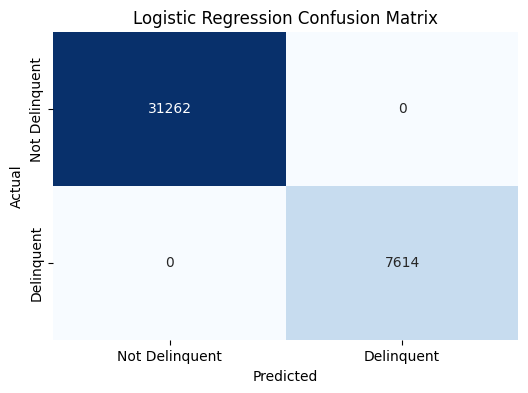

Logistic Regression ROC-AUC Score: 1.0

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy                           1.00     38876
   macro avg       1.00      1.00      1.00     38876
weighted avg       1.00      1.00      1.00     38876

Naive Bayes Confusion Matrix:
[[31262     0]
 [    0  7614]]


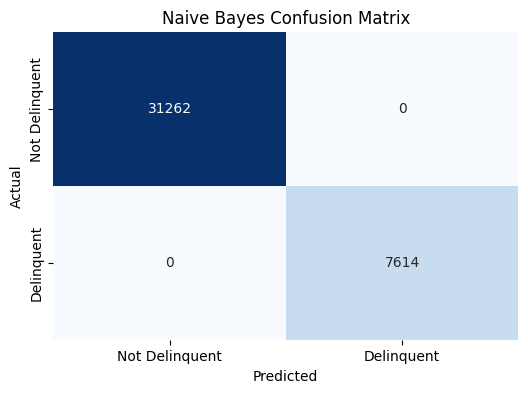

Naive Bayes ROC-AUC Score: 1.0

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy                           1.00     38876
   macro avg       1.00      1.00      1.00     38876
weighted avg       1.00      1.00      1.00     38876

Decision Tree Confusion Matrix:
[[31262     0]
 [    0  7614]]


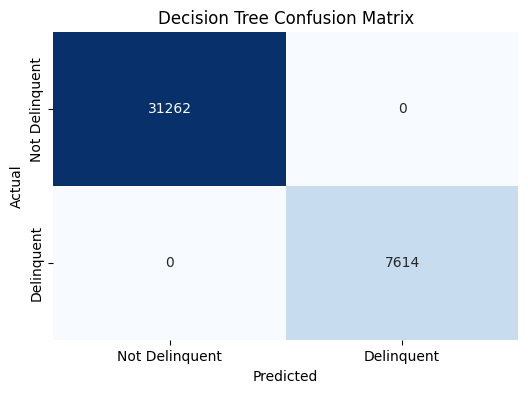

Decision Tree ROC-AUC Score: 1.0



In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Cross-validation setup
skf = StratifiedKFold(n_splits=5)

# Perform k-fold cross-validation and check for consistency
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
    print(f"{name} Cross-Validation ROC-AUC Scores: {cv_scores}")
    print(f"{name} Mean ROC-AUC Score: {cv_scores.mean()}\n")



for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Delinquent', 'Delinquent'],
                yticklabels=['Not Delinquent', 'Delinquent'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"{name} ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob)}\n")



**Check the data leakage**

DelinquencyRatio and DelinquentLoanTermRatio, are derived from the following features:

* DelinquencyRatio: This is typically calculated as the ratio of MonthsDelinquent to MonthsInRepayment.

* DelinquentLoanTermRatio: This is calculated as the ratio of MonthsDelinquent to the total loan term (OrigLoanTerm or similar).

These ratios do incorporate information about delinquency, but they don't necessarily indicate whether a loan is currently delinquent or not. However, they still have a strong relationship with delinquency status because:

* DelinquencyRatio: If a loan has a high ratio, it means a significant portion of the time in repayment has been spent in delinquency. This could make it easier for the model to predict that a loan is delinquent.

* DelinquentLoanTermRatio: Similar to the DelinquencyRatio, a high ratio would indicate that a significant portion of the loan term has been delinquent, which can easily indicate to the model the delinquency status.

The feature 'MonthsDelinquent' represents the number of months a loan has been delinquent. This feature is directly related to the target variable EverDelinquent.

We have to remove these features that indicate direct informaation about the
 loan delinquency status

check data

In [ ]:
# Removing the specified columns
X_initial_train= X_train.drop(columns=['DelinquencyRatio', 'DelinquentLoanTermRatio', 'MonthsDelinquent'])

# Display the first few rows to verify
X_initial_train.head(20)

# Removing the specified columns
X_initial_test= X_test.drop(columns=['DelinquencyRatio', 'DelinquentLoanTermRatio', 'MonthsDelinquent'])

# Display the first few rows to verify
X_initial_test.head(20)

,FICO_Category_Encoded,PaymentProgressRatio,MonthsInRepayment,YearsInRepayment_Group_Encoded,NumBorrowers,Channel_Frequency,LTV_Group_Encoded,isHomeFirstBuyer,OCLTV,DTI,OrigInterestRate
0,-1.403831,-0.339409,-0.339050,-0.779498,0.747057,0.842378,-1.044855,-0.386825,-0.589227,1.089334,-1.288765
1,-0.167304,-0.294632,-0.294253,-0.779498,-1.338586,-1.128059,1.315937,-0.386825,1.108356,0.905794,0.177915
2,1.069222,2.548695,2.550321,2.220627,0.747057,-1.128059,1.315937,2.585151,1.108356,-0.837838,0.177915
3,1.069222,-0.272243,-0.271855,0.220544,0.747057,-1.128059,1.315937,-0.386825,0.781898,-0.011907,-0.188755
4,-1.403831,-1.123003,-1.122988,-0.779498,0.747057,0.842378,-1.044855,-0.386825,-0.850394,-0.654297,0.177915
5,-0.167304,-0.182690,-0.182262,0.220544,0.747057,0.842378,-1.044855,-0.386825,-2.025643,-1.021378,0.177915
6,-0.167304,-0.563293,-0.563032,-0.779498,-1.338586,0.842378,0.135541,-0.386825,0.716606,-0.287217,-0.188755
7,-0.167304,-0.361797,-0.361448,-0.779498,-1.338586,0.842378,0.135541,-0.386825,0.128981,0.355174,-1.288765
8,-0.167304,0.377020,0.377693,0.220544,-1.338586,0.842378,-1.044855,-0.386825,-1.176852,0.446944,-0.555425
9,-0.167304,-0.160301,-0.159864,0.220544,0.747057,0.842378,-1.044855,-0.386825,-1.960352,2.282346,-0.188755


In [ ]:
# Removing the specified columns
X_initial_test= X_test.drop(columns=['DelinquencyRatio', 'DelinquentLoanTermRatio', 'MonthsDelinquent'])

# Display the first few rows to verify
X_initial_test.head(20)

,FICO_Category_Encoded,PaymentProgressRatio,MonthsInRepayment,YearsInRepayment_Group_Encoded,NumBorrowers,Channel_Frequency,LTV_Group_Encoded,isHomeFirstBuyer,OCLTV,DTI,OrigInterestRate
0,1.069222,0.377020,0.377693,0.220544,-1.338586,-1.128059,0.135541,-0.386825,0.128981,-1.571998,0.177915
1,1.069222,-0.249855,-0.249457,0.220544,0.747057,0.842378,-1.044855,-0.386825,-0.197477,-0.103677,-0.555425
2,-1.403831,-0.249855,-0.249457,0.220544,0.747057,0.842378,1.315937,-0.386825,0.781898,1.181104,-0.188755
3,-1.403831,-0.384185,-0.383846,-0.779498,0.747057,0.842378,0.135541,-0.386825,0.586023,0.538714,-0.188755
4,1.069222,-0.406574,-0.406245,-0.779498,-1.338586,-1.128059,-1.044855,-0.386825,-0.262769,-0.837838,0.544586
5,1.069222,0.108359,0.108915,0.220544,-1.338586,-1.128059,0.135541,-0.386825,0.586023,1.364645,-1.288765
6,-1.403831,0.085971,0.086516,0.220544,0.747057,0.842378,-1.044855,-0.386825,-0.393352,-1.663768,0.544586
7,-0.167304,-0.317020,-0.316652,-0.779498,0.747057,-6.722765,0.135541,-0.386825,0.259564,-0.378987,-0.555425
8,-0.167304,1.518829,1.520003,1.220586,0.747057,0.842378,0.135541,-0.386825,0.128981,-0.195447,-0.188755
9,1.069222,1.787490,1.788782,1.220586,0.747057,0.842378,0.135541,-0.386825,0.128981,-2.030849,-0.555425


lets build the models again

Logistic Regression Cross-Validation ROC-AUC Scores: [0.73715278 0.73882929 0.73386967 0.74500131 0.73111276]
Logistic Regression Mean ROC-AUC Score: 0.7371931641117998

Naive Bayes Cross-Validation ROC-AUC Scores: [0.71121432 0.71675975 0.71342569 0.71845659 0.70573505]
Naive Bayes Mean ROC-AUC Score: 0.7131182793766113

Decision Tree Cross-Validation ROC-AUC Scores: [0.56405837 0.57394622 0.57619693 0.57136297 0.57186086]
Decision Tree Mean ROC-AUC Score: 0.5714850707589392

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     31262
           1       0.61      0.14      0.23      7614

    accuracy                           0.81     38876
   macro avg       0.72      0.56      0.56     38876
weighted avg       0.78      0.81      0.76     38876

Logistic Regression Confusion Matrix:
[[30560   702]
 [ 6519  1095]]


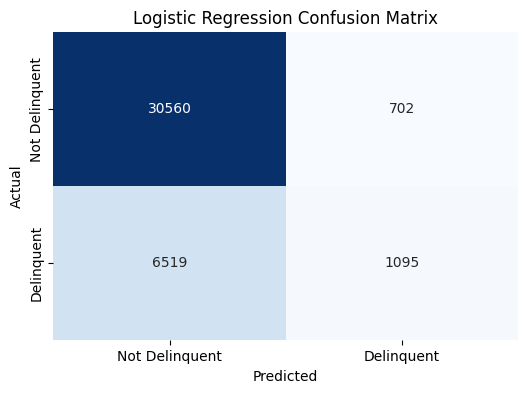

Logistic Regression ROC-AUC Score: 0.7385385687756159

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     31262
           1       0.40      0.25      0.31      7614

    accuracy                           0.78     38876
   macro avg       0.62      0.58      0.59     38876
weighted avg       0.75      0.78      0.76     38876

Naive Bayes Confusion Matrix:
[[28479  2783]
 [ 5730  1884]]


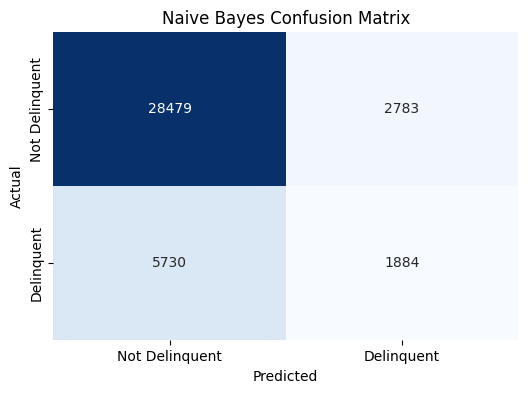

Naive Bayes ROC-AUC Score: 0.713722956914621

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     31262
           1       0.30      0.32      0.31      7614

    accuracy                           0.72     38876
   macro avg       0.56      0.57      0.57     38876
weighted avg       0.73      0.72      0.72     38876

Decision Tree Confusion Matrix:
[[25510  5752]
 [ 5176  2438]]


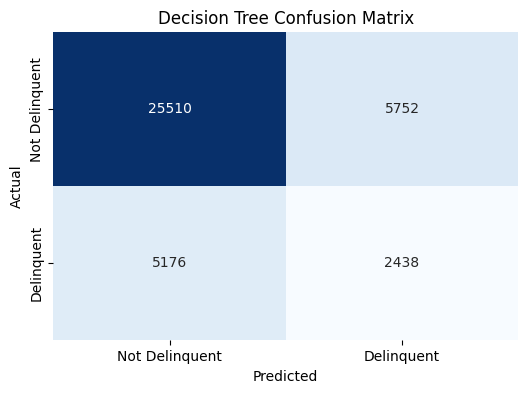

Decision Tree ROC-AUC Score: 0.5685142295429477



In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Cross-validation setup on training data
skf = StratifiedKFold(n_splits=5)

# Perform k-fold cross-validation on the training data
for name, model in models.items():
    cv_scores = cross_val_score(model, X_initial_train, y_train, cv=skf, scoring='roc_auc')
    print(f"{name} Cross-Validation ROC-AUC Scores: {cv_scores}")
    print(f"{name} Mean ROC-AUC Score: {cv_scores.mean()}\n")

# Final evaluation on the test set
for name, model in models.items():
    model.fit(X_initial_train, y_train)
    y_pred = model.predict(X_initial_test)
    y_pred_prob = model.predict_proba(X_initial_test)[:, 1]

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Delinquent', 'Delinquent'],
                yticklabels=['Not Delinquent', 'Delinquent'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"{name} ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob)}\n")


We can see clearly that the models do no perform well after removing the tree features

Lets try improve models performance using the following techniques:

**Adjusting the Decision Threshold for Logistic Regression:**

In [ ]:
# Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_initial_train, y_train)

# Predict probabilities
y_pred_prob = log_reg.predict_proba(X_initial_test)[:, 1]

# Adjust threshold
threshold = 0.55 # You can adjust this value
y_pred_adj = (y_pred_prob >= threshold).astype(int)

# Metrics after threshold adjustment
print("Logistic Regression Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adj))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adj))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Logistic Regression Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     31262
           1       0.38      0.58      0.46      7614

    accuracy                           0.73     38876
   macro avg       0.63      0.67      0.64     38876
weighted avg       0.78      0.73      0.75     38876

Confusion Matrix:
[[23927  7335]
 [ 3203  4411]]
ROC-AUC Score: 0.7388669365095666


**Using Ensemble Methods (Random Forest):**

In [ ]:
# Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(X_initial_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_initial_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_initial_test)[:, 1]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     31262
           1       0.45      0.21      0.28      7614

    accuracy                           0.79     38876
   macro avg       0.64      0.57      0.58     38876
weighted avg       0.75      0.79      0.76     38876

ROC-AUC Score: 0.6911559924739884
Confusion Matrix:
[[29289  1973]
 [ 6023  1591]]


In [ ]:
# Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(X_initial_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_initial_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_initial_test)[:, 1]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     31262
           1       0.45      0.21      0.28      7614

    accuracy                           0.79     38876
   macro avg       0.64      0.57      0.58     38876
weighted avg       0.75      0.79      0.76     38876

ROC-AUC Score: 0.6911559924739884
Confusion Matrix:
[[29289  1973]
 [ 6023  1591]]


**Hyperparameter Tuning (GridSearchCV for Logistic Regression)**

In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  # Remove 'l1' since lbfgs does not support it
}

# Create a logistic regression model
log_reg = LogisticRegression(solver='lbfgs', class_weight='balanced', random_state=42)

# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_initial_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_initial_test)
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC Score:", roc_auc_score(y_test, best_log_reg.predict_proba(X_initial_test)[:, 1]))
print(confusion_matrix(y_test, y_pred_best))

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     31262
           1       0.35      0.66      0.45      7614

    accuracy                           0.69     38876
   macro avg       0.62      0.68      0.62     38876
weighted avg       0.79      0.69      0.72     38876

ROC-AUC Score: 0.7388950129359939
[[21797  9465]
 [ 2620  4994]]


Lets add other features

In [ ]:
 Train_data.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR'],
      dtype='object')

In [ ]:
X_train=Train_data[['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded',
       'PaymentProgressRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR']]

In [ ]:
X_test=Test_data[['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded',
       'PaymentProgressRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR']]

In [ ]:
X_train.head()

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,PaymentProgressRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR
0,-0.786250,-0.121637,-0.589227,1.089334,0.328832,-1.288765,0.071167,0.747057,-0.339050,-0.386825,-0.211546,0.842378,-0.635682,0.209246,0.450602,2.234890,-1.044855,-1.403831,-0.779498,-0.339409,0.488112,-1.288765,0.215596,-0.389454,-0.525038
1,1.494836,-0.121637,1.108356,0.905794,-0.479831,0.177915,0.071167,-1.338586,-0.294253,-0.386825,-0.211546,-1.128059,0.894798,0.209246,0.450602,-0.344070,1.315937,-0.167304,-0.779498,-0.294632,-0.495862,0.177915,-0.467182,-0.592234,-0.484449
2,1.494836,-0.121637,1.108356,-0.837838,-1.551778,0.177915,0.071167,0.747057,2.550321,2.585151,4.727097,-1.128059,0.894798,0.209246,0.450602,-0.317463,1.315937,1.069222,2.220627,2.548695,-1.534501,0.177915,-1.552570,-0.738972,0.253214
3,1.114655,-0.121637,0.781898,-0.011907,-0.799534,-0.188755,0.071167,0.747057,-0.271855,-0.386825,4.727097,-1.128059,-0.635682,0.209246,0.450602,-0.708742,1.315937,1.069222,0.220544,-0.272243,-0.778133,-0.188755,-0.810786,-0.540541,-0.205398
4,-0.786250,-0.121637,-0.850394,-0.654297,-0.103708,0.177915,0.071167,0.747057,-1.122988,-0.386825,-0.211546,0.842378,-1.658648,0.209246,0.450602,-0.582361,-1.044855,-1.403831,-0.779498,-1.123003,-0.131427,0.177915,-0.086343,0.101889,0.122764


In [ ]:
y_train

,EverDelinquent
0,0
1,0
2,0
3,0
4,0
...,...
155499,1
155500,0
155501,0
155502,1


In [ ]:
y_test

,EverDelinquent
0,0
1,0
2,0
3,1
4,0
...,...
38871,0
38872,0
38873,0
38874,0


lets evaluate the three models on these specific columns

Logistic Regression Cross-Validation ROC-AUC Scores: [0.73950261 0.74005102 0.73482534 0.74622675 0.73195887]
Logistic Regression Mean ROC-AUC Score: 0.7385129176274404

Naive Bayes Cross-Validation ROC-AUC Scores: [0.68727895 0.69250994 0.68839188 0.69471535 0.68098158]
Naive Bayes Mean ROC-AUC Score: 0.6887755395368833

Decision Tree Cross-Validation ROC-AUC Scores: [0.56598866 0.56812187 0.57288549 0.57076523 0.57284349]
Decision Tree Mean ROC-AUC Score: 0.5701209496498288

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     31262
           1       0.35      0.66      0.45      7614

    accuracy                           0.69     38876
   macro avg       0.62      0.68      0.62     38876
weighted avg       0.79      0.69      0.72     38876

Logistic Regression Confusion Matrix:
[[21743  9519]
 [ 2583  5031]]


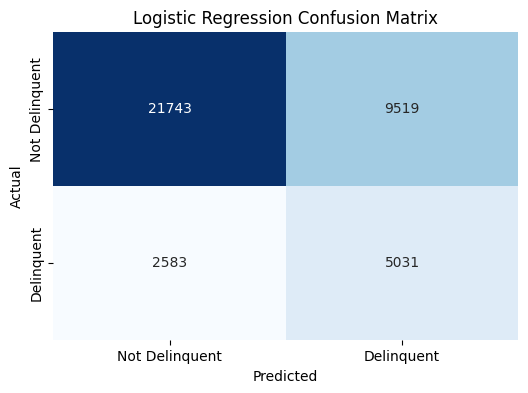

Logistic Regression ROC-AUC Score: 0.7400345532878811

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     31262
           1       0.39      0.31      0.35      7614

    accuracy                           0.77     38876
   macro avg       0.61      0.60      0.60     38876
weighted avg       0.75      0.77      0.76     38876

Naive Bayes Confusion Matrix:
[[27491  3771]
 [ 5223  2391]]


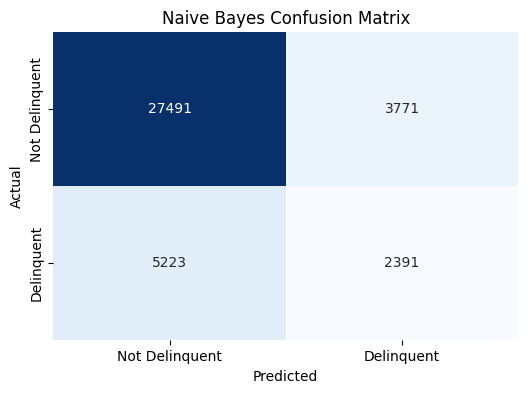

Naive Bayes ROC-AUC Score: 0.6883707945878228

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     31262
           1       0.29      0.31      0.30      7614

    accuracy                           0.72     38876
   macro avg       0.56      0.56      0.56     38876
weighted avg       0.72      0.72      0.72     38876

Decision Tree Confusion Matrix:
[[25492  5770]
 [ 5260  2354]]


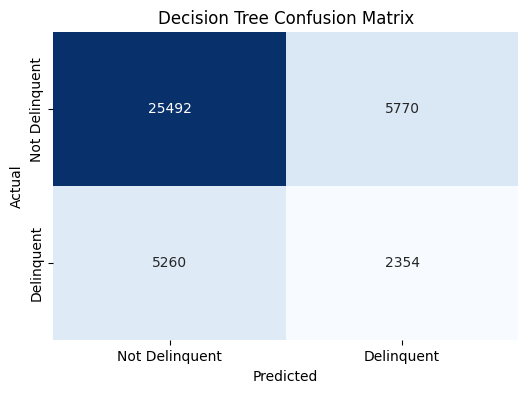

Decision Tree ROC-AUC Score: 0.5622990989479477



In [ ]:
# Initialize models with corrected parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=0.01, penalty='l2', solver='lbfgs', class_weight='balanced', random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Cross-validation setup on training data
skf = StratifiedKFold(n_splits=5)

# Perform k-fold cross-validation on the training data
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
    print(f"{name} Cross-Validation ROC-AUC Scores: {cv_scores}")
    print(f"{name} Mean ROC-AUC Score: {cv_scores.mean()}\n")

# Final evaluation on the test set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Delinquent', 'Delinquent'],
                yticklabels=['Not Delinquent', 'Delinquent'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"{name} ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob)}\n")


Try using smote technique which may improve the model performance

In [ ]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Logistic Regression model after SMOTE
log_reg.fit(X_res, y_res)

# Evaluate the model
y_pred_smote = log_reg.predict(X_test)
print("Logistic Regression after SMOTE Classification Report:")
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
cm = confusion_matrix(y_test, y_pred)
print(f"{name} Confusion Matrix:")
print(cm)

Logistic Regression after SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     31262
           1       0.35      0.66      0.45      7614

    accuracy                           0.69     38876
   macro avg       0.62      0.68      0.62     38876
weighted avg       0.79      0.69      0.72     38876

ROC-AUC Score: 0.7396838941401007
Decision Tree Confusion Matrix:
[[25492  5770]
 [ 5260  2354]]


We may need other features that can help the model to correctly identify the instances

We can now keep the Months delinquent

Because the model learns from this feature to predict the delinquency status

So we can save the results we got before.




We decided to remove the two columns 'DelinquentLoanTermRatio', 'DelinquencyRatio' and checking models performance

In [ ]:
Train_data.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR'],
      dtype='object')

In [ ]:
X_train=Train_data[[ 'MonthsDelinquent', 'FICO_Category_Encoded',
                       'PaymentProgressRatio',
                        'MonthsInRepayment',
                        'YearsInRepayment_Group_Encoded', 'NumBorrowers',
                        'Channel_Frequency', 'LTV_Group_Encoded','isHomeFirstBuyer',
                        'OCLTV','DTI','OrigInterestRate']]

In [ ]:
X_test=Test_data[[ 'MonthsDelinquent', 'FICO_Category_Encoded',
                       'PaymentProgressRatio',
                        'MonthsInRepayment',
                        'YearsInRepayment_Group_Encoded', 'NumBorrowers',
                        'Channel_Frequency', 'LTV_Group_Encoded','isHomeFirstBuyer',
                        'OCLTV','DTI','OrigInterestRate']]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy                           1.00     38876
   macro avg       1.00      1.00      1.00     38876
weighted avg       1.00      1.00      1.00     38876

Logistic Regression Confusion Matrix:
[[31262     0]
 [    0  7614]]


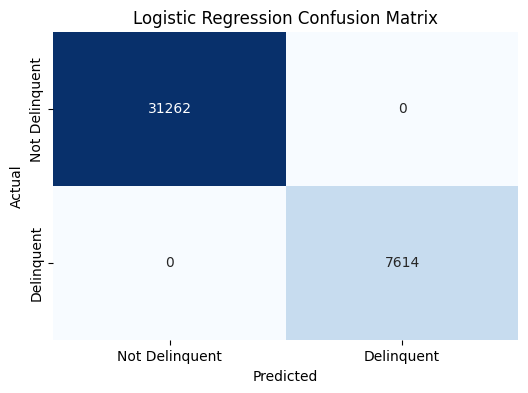

Logistic Regression Cross-Validated ROC-AUC Mean Score: 1.0
Logistic Regression ROC-AUC Score on Test Set: 1.0

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31262
           1       1.00      1.00      1.00      7614

    accuracy                           1.00     38876
   macro avg       1.00      1.00      1.00     38876
weighted avg       1.00      1.00      1.00     38876

Decision Tree Confusion Matrix:
[[31262     0]
 [    0  7614]]


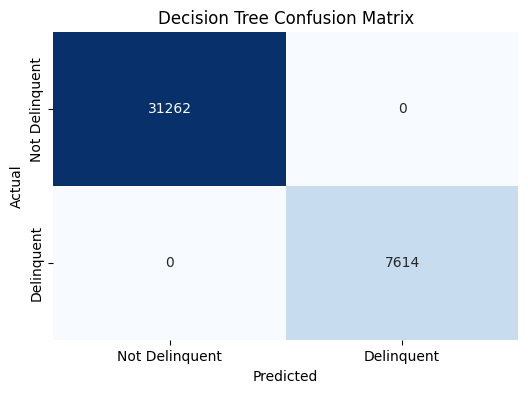

Decision Tree Cross-Validated ROC-AUC Mean Score: 1.0
Decision Tree ROC-AUC Score on Test Set: 1.0

GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     31262
           1       0.94      1.00      0.97      7614

    accuracy                           0.99     38876
   macro avg       0.97      0.99      0.98     38876
weighted avg       0.99      0.99      0.99     38876

GaussianNB Confusion Matrix:
[[30812   450]
 [    0  7614]]


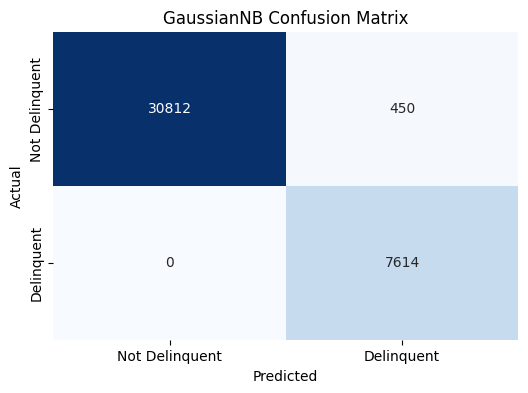

GaussianNB Cross-Validated ROC-AUC Mean Score: 1.0
GaussianNB ROC-AUC Score on Test Set: 1.0

BernoulliNB Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     31262
           1       0.85      0.62      0.72      7614

    accuracy                           0.90     38876
   macro avg       0.88      0.80      0.83     38876
weighted avg       0.90      0.90      0.90     38876

BernoulliNB Confusion Matrix:
[[30445   817]
 [ 2893  4721]]


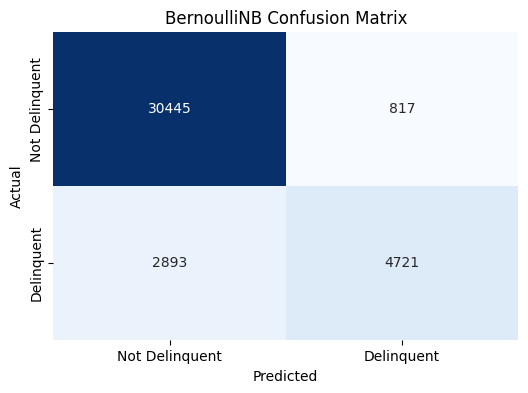

BernoulliNB Cross-Validated ROC-AUC Mean Score: 0.8451949103322957
BernoulliNB ROC-AUC Score on Test Set: 0.8484155690729076

             Algorithm  CV_Roc_Auc_Score  Training_accuracy  Testing_accuracy  \
0  Logistic Regression          1.000000           1.000000          1.000000   
1        Decision Tree          1.000000           1.000000          1.000000   
2           GaussianNB          1.000000           0.988566          0.988425   
3          BernoulliNB          0.845195           0.904684          0.904568   

   Roc_Auc_score  f1_score  
0       1.000000  1.000000  
1       1.000000  1.000000  
2       1.000000  0.971297  
3       0.848416  0.717914  


In [ ]:


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB()
}

# Initialize lists to store the scores
training_score = []
testing_score = []
Roc_Auc_score = []
f1_score_ = []
cv_roc_auc_score = []

# Stratified K-Fold Cross-Validation setup
skf = StratifiedKFold(n_splits=5)

# Perform training and evaluation with cross-validation
for name, model in models.items():
    # Cross-Validation on training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
    cv_roc_auc_mean = cv_scores.mean()
    cv_roc_auc_score.append(cv_roc_auc_mean)

    # Fit the model on the entire training data
    model.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = model.predict(X_train)

    # Predict on testing data
    y_test_pred = model.predict(X_test)

    # Predict probabilities for ROC-AUC
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate scores
    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_prob)
    f1 = f1_score(y_test, y_test_pred)

    # Append scores to the lists
    training_score.append(training_accuracy)
    testing_score.append(testing_accuracy)
    Roc_Auc_score.append(roc_auc)
    f1_score_.append(f1)

    # Print classification report and confusion matrix
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Delinquent', 'Delinquent'],
                yticklabels=['Not Delinquent', 'Delinquent'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"{name} Cross-Validated ROC-AUC Mean Score: {cv_roc_auc_mean}")
    print(f"{name} ROC-AUC Score on Test Set: {roc_auc}\n")

# Create the results DataFrame
results = pd.DataFrame({
    'Algorithm': list(models.keys()),
    'CV_Roc_Auc_Score': cv_roc_auc_score,
    'Training_accuracy': training_score,
    'Testing_accuracy': testing_score,
    'Roc_Auc_score': Roc_Auc_score,
    'f1_score': f1_score_
})

# Display the results DataFrame
print(results)


In [ ]:
results

,Algorithm,CV_Roc_Auc_Score,Training_accuracy,Testing_accuracy,Roc_Auc_score,f1_score
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,GaussianNB,1.000000,0.988566,0.988425,1.000000,0.971297
3,BernoulliNB,0.845195,0.904684,0.904568,0.848416,0.717914


**Results:**

- Logistic Regression seems to be the best model , as it performs perfectly with a simpler and more interpretable model compared to Decision Tree.
- GaussianNB is robust against data problems if we consider a model that may generalize better on unseen data.

Save the two  models

In [ ]:
# Path to save the models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save the Logistic Regression model
logistic_regression_model_path = os.path.join(save_dir, "logistic_regression_model.pkl")
joblib.dump(models["Logistic Regression"], logistic_regression_model_path)

# Save the Gaussian Naive Bayes model
gaussian_nb_model_path = os.path.join(save_dir, "gaussian_nb_model.pkl")
joblib.dump(models["GaussianNB"], gaussian_nb_model_path)

print(f"Logistic Regression model saved to {logistic_regression_model_path}")
print(f"Gaussian Naive Bayes model saved to {gaussian_nb_model_path}")


Logistic Regression model saved to saved_models/logistic_regression_model.pkl
Gaussian Naive Bayes model saved to saved_models/gaussian_nb_model.pkl
